<a href="https://colab.research.google.com/github/Radekcpp/Predicting-dota-2-game-winner/blob/main/dota2_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd

PATH_TO_DATA = ''

#importing data
df_train_features = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_features.csv'), index_col='match_id_hash')
df_train_targets = pd.read_csv(os.path.join(PATH_TO_DATA, 'train_targets.csv'), index_col='match_id_hash')



In [ ]:
df_train_features.shape

(39675, 245)

In [ ]:
#initial data
df_train_features

,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,d5_stuns,d5_creeps_stacked,d5_camps_stacked,d5_rune_pickups,d5_firstblood_claimed,d5_teamfight_participation,d5_towers_killed,d5_roshans_killed,d5_obs_placed,d5_sen_placed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0.000000,0,0,0,0,0.0000,0,0,0,0
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,0.000000,0,0,0,0,0.0000,0,0,0,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0.000000,0,0,0,0,0.0000,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,8.664527,3,1,3,0,0.0000,0,0,2,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,0.000000,2,1,2,0,0.2500,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
defd0caeed6ea83d7d5fbdec013fe7d1,1783,22,0,8,23,3,1,9,9,0,...,26.493834,6,2,3,0,0.5625,0,0,7,2
bc7a87ed5f9c2bca55f9f7a93da0b0c5,377,22,7,1,0,14,0,2,1,1,...,0.000000,0,0,1,0,0.0000,0,0,0,0
e2ca68ac1a6847f4a37f6c9c8ee8695b,643,22,7,1,23,63,1,4,0,2,...,2.532715,0,0,3,1,0.5000,0,0,1,0


In [ ]:
#summing information about players to get information about teams
df_train_features['radiant_gold'] = df_train_features['r1_gold'] + df_train_features['r2_gold'] + df_train_features['r3_gold'] + df_train_features['r4_gold'] + df_train_features['r5_gold'] 
df_train_features['dire_gold'] = df_train_features['d1_gold'] + df_train_features['d2_gold'] + df_train_features['d3_gold'] + df_train_features['d4_gold'] + df_train_features['d5_gold'] 
df_train_features['radiant_xp'] = df_train_features['r1_xp'] + df_train_features['r2_xp'] + df_train_features['r3_xp'] + df_train_features['r4_xp'] + df_train_features['r5_xp'] 
df_train_features['dire_xp'] = df_train_features['d1_xp'] + df_train_features['d2_xp'] + df_train_features['d3_xp'] + df_train_features['d4_xp'] + df_train_features['d5_xp'] 
df_train_features['radiant_kills'] = df_train_features['r1_kills'] + df_train_features['r2_kills'] + df_train_features['r3_kills'] + df_train_features['r4_kills'] + df_train_features['r5_kills'] 
df_train_features['dire_kills'] = df_train_features['d1_kills'] + df_train_features['d2_kills'] + df_train_features['d3_kills'] + df_train_features['d4_kills'] + df_train_features['d5_kills'] 
df_train_features['radiant_roshans'] = df_train_features['r1_roshans_killed'] + df_train_features['r2_roshans_killed'] + df_train_features['r3_roshans_killed'] + df_train_features['r4_roshans_killed'] + df_train_features['r5_roshans_killed'] 
df_train_features['dire_roshans'] = df_train_features['d1_roshans_killed'] + df_train_features['d2_roshans_killed'] + df_train_features['d3_roshans_killed'] + df_train_features['d4_roshans_killed'] + df_train_features['d5_roshans_killed'] 
df_train_features['radiant_camps_stacked'] = df_train_features['r1_camps_stacked'] + df_train_features['r2_camps_stacked'] + df_train_features['r3_camps_stacked'] + df_train_features['r4_camps_stacked'] + df_train_features['r5_camps_stacked'] 
df_train_features['dire_camps_stacked'] = df_train_features['d1_camps_stacked'] + df_train_features['d2_camps_stacked'] + df_train_features['d3_camps_stacked'] + df_train_features['d4_camps_stacked'] + df_train_features['d5_camps_stacked']
df_train_features['radiant_firstblood_claimed'] = df_train_features['r1_firstblood_claimed'] + df_train_features['r2_firstblood_claimed'] + df_train_features['r3_firstblood_claimed'] + df_train_features['r4_firstblood_claimed'] + df_train_features['r5_firstblood_claimed'] 
df_train_features['dire_firstblood_claimed'] = df_train_features['d1_firstblood_claimed'] + df_train_features['d2_firstblood_claimed'] + df_train_features['d3_firstblood_claimed'] + df_train_features['d4_firstblood_claimed'] + df_train_features['d5_firstblood_claimed']  
df_train_features['radiant_towers_killed'] = df_train_features['r1_towers_killed'] + df_train_features['r2_towers_killed'] + df_train_features['r3_towers_killed'] + df_train_features['r4_firstblood_claimed'] + df_train_features['r5_towers_killed'] 
df_train_features['dire_towers_killed'] = df_train_features['d1_towers_killed'] + df_train_features['d2_towers_killed'] + df_train_features['d3_towers_killed'] + df_train_features['d4_firstblood_claimed'] + df_train_features['d5_towers_killed'] 


df_train_features.head()




,game_time,game_mode,lobby_type,objectives_len,chat_len,r1_hero_id,r1_kills,r1_deaths,r1_assists,r1_denies,...,radiant_kills,dire_kills,radiant_roshans,dire_roshans,radiant_camps_stacked,dire_camps_stacked,radiant_firstblood_claimed,dire_firstblood_claimed,radiant_towers_killed,dire_towers_killed
match_id_hash,,,,,,,,,,,,,,,,,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,22,7,1,11,11,0,0,0,0,...,0,1,0,0,0,0,0,1,0,1
b9c57c450ce74a2af79c9ce96fac144d,658,4,0,3,10,15,7,2,0,7,...,16,3,0,0,1,2,0,1,1,0
6db558535151ea18ca70a6892197db41,21,23,0,0,0,101,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46a0ddce8f7ed2a8d9bd5edcbb925682,576,22,7,1,4,14,1,0,3,1,...,6,1,0,0,0,2,1,0,0,0
b1b35ff97723d9b7ade1c9c3cf48f770,453,22,7,1,3,42,0,1,1,0,...,2,4,0,0,0,1,1,0,0,0


In [ ]:
#deleting columns with reduntant information about game
df_train_features.drop(['game_mode', 'lobby_type', 'objectives_len', 'chat_len'], inplace=True, axis=1)


In [ ]:
#deleting columns with reduntant information about players, later use ICA/PCA for limiting the number of attributes
df_train_features.drop(['r1_x', 'r1_y', 'r2_x', 'r2_y', 'r3_x', 'r3_y','r4_x', 'r4_y','r5_x', 'r5_y', 
                        'd1_x', 'd1_y', 'd2_x', 'd2_y', 'd3_x', 'd3_y','d4_x', 'd4_y','d5_x', 'd5_y',
                        'r1_creeps_stacked', 'r2_creeps_stacked', 'r3_creeps_stacked', 'r4_creeps_stacked', 'r5_creeps_stacked',
                        'd1_creeps_stacked', 'd2_creeps_stacked', 'd3_creeps_stacked', 'd4_creeps_stacked', 'd5_creeps_stacked',
                        'r1_max_health',  'r2_max_health', 'r3_max_health', 'r4_max_health', 'r5_max_health',
                        'd1_max_health',  'd2_max_health', 'd3_max_health', 'd4_max_health', 'd5_max_health',
                        'r1_max_mana',  'r2_max_mana', 'r3_max_mana', 'r4_max_mana', 'r5_max_mana',
                        'd1_max_mana',  'd2_max_mana', 'd3_max_mana', 'd4_max_mana', 'd5_max_mana',
                        'r1_health',  'r2_health', 'r3_health', 'r4_health', 'r5_health',
                        'd1_health',  'd2_health', 'd3_health', 'd4_health', 'd5_health',
                        'r1_xp',  'r2_xp', 'r3_xp', 'r4_xp', 'r5_xp',
                        'd1_xp',  'd2_xp', 'd3_xp', 'd4_xp', 'd5_xp',
                        'r1_gold',  'r2_gold', 'r3_gold', 'r4_gold', 'r5_gold',
                        'd1_gold',  'd2_gold', 'd3_gold', 'd4_gold', 'd5_gold',  
                        'r1_deaths',  'r2_deaths', 'r3_deaths', 'r4_deaths', 'r5_deaths',
                        'd1_deaths',  'd2_deaths', 'd3_deaths', 'd4_deaths', 'd5_deaths',
                        'r1_assists',  'r2_assists', 'r3_assists', 'r4_assists', 'r5_assists',
                        'd1_assists',  'd2_assists', 'd3_assists', 'd4_assists', 'd5_assists',
                        'r1_denies',  'r2_denies', 'r3_denies', 'r4_denies', 'r5_denies',
                        'd1_denies',  'd2_denies', 'd3_denies', 'd4_denies', 'd5_denies',
                        'r1_roshans_killed',  'r2_roshans_killed', 'r3_roshans_killed', 'r4_roshans_killed', 'r5_roshans_killed',
                        'd1_roshans_killed',  'd2_roshans_killed', 'd3_roshans_killed', 'd4_roshans_killed', 'd5_roshans_killed',
                        'r1_stuns',  'r2_stuns', 'r3_stuns', 'r4_stuns', 'r5_stuns',
                        'd1_stuns',  'd2_stuns', 'd3_stuns', 'd4_stuns', 'd5_stuns',
                        'r1_camps_stacked',  'r2_camps_stacked', 'r3_camps_stacked', 'r4_camps_stacked', 'r5_camps_stacked',
                        'd1_camps_stacked',  'd2_camps_stacked', 'd3_camps_stacked', 'd4_camps_stacked', 'd5_camps_stacked',
                        'r1_firstblood_claimed',  'r2_firstblood_claimed', 'r3_firstblood_claimed', 'r4_firstblood_claimed', 'r5_firstblood_claimed',
                        'd1_firstblood_claimed',  'd2_firstblood_claimed', 'd3_firstblood_claimed', 'd4_firstblood_claimed', 'r5_firstblood_claimed',
                        'r1_towers_killed',  'r2_towers_killed', 'r3_towers_killed', 'r4_towers_killed', 'r5_firstblood_claimed',
                        'd1_towers_killed',  'd2_towers_killed', 'd3_towers_killed', 'd4_towers_killed', 'd5_towers_killed',], inplace=True, axis=1)

In [ ]:
df_train_features.shape


(39675, 97)

In [ ]:
df_train_targets.shape


(39675, 5)

In [ ]:
df_train_targets.head()

,game_time,radiant_win,duration,time_remaining,next_roshan_team
match_id_hash,,,,,
a400b8f29dece5f4d266f49f1ae2e98a,155,False,992,837,NaN
b9c57c450ce74a2af79c9ce96fac144d,658,True,1154,496,NaN
6db558535151ea18ca70a6892197db41,21,True,1503,1482,Radiant
46a0ddce8f7ed2a8d9bd5edcbb925682,576,True,1952,1376,NaN
b1b35ff97723d9b7ade1c9c3cf48f770,453,False,2001,1548,NaN


In [ ]:
X = df_train_features.values
y = df_train_targets['radiant_win'].values


In [ ]:
from sklearn.model_selection import train_test_split

#splitting data into training and tests set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                                                      test_size=0.3, 
                                                      random_state=17)

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
#standaraizing the preprocessed data

X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
y_train = np.array(y_train)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score
#creating first, simple model
model_rfc = RandomForestClassifier(n_estimators=100, n_jobs=4, random_state=17)
model_rfc.fit(X_train, y_train)



display(model_rfc.score(X_train_scaled, y_train))

0.46114791876710354

In [ ]:
#CHecking ROC-AUC of the model
y_pred = model_rfc.predict_proba(X_valid)[:, 1]
from sklearn.metrics import roc_auc_score

valid_score = roc_auc_score(y_valid, y_pred)
print('Validation ROC-AUC score:', valid_score)

Validation ROC-AUC score: 0.7856417249458801


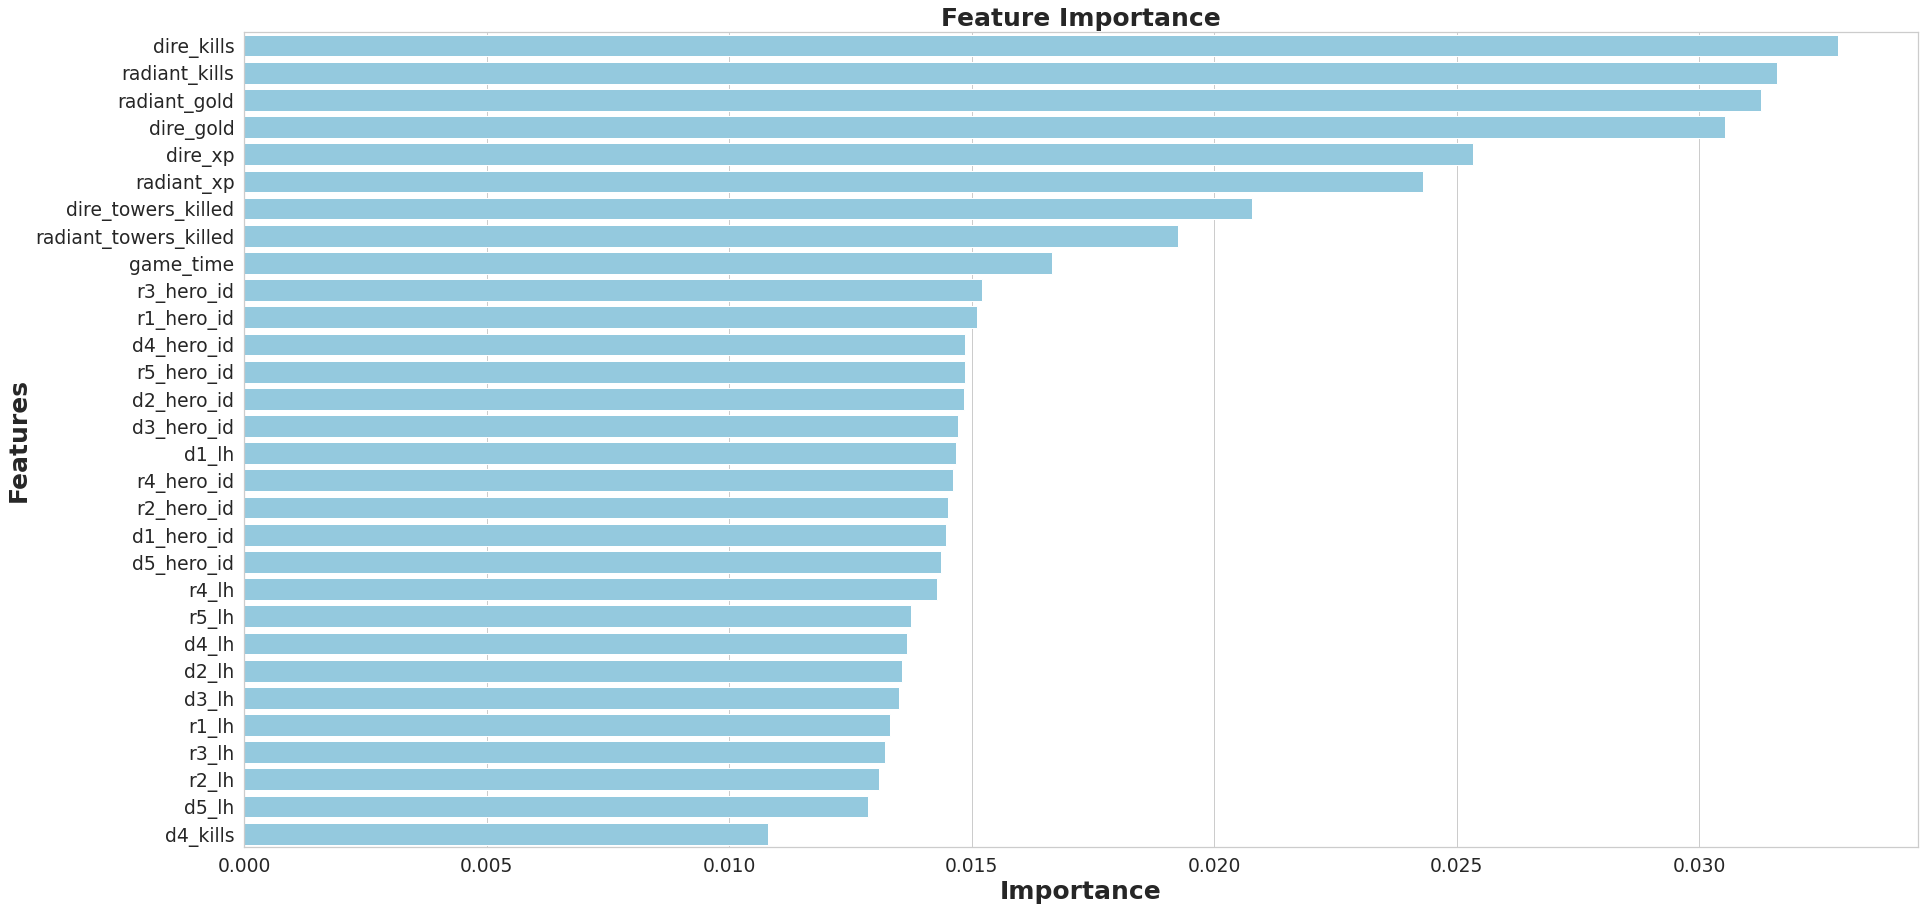

None

,Features,Gini-Importance
0,dire_kills,0.032864
1,radiant_kills,0.031605
2,radiant_gold,0.031264
3,dire_gold,0.030524
4,dire_xp,0.025341
5,radiant_xp,0.024312
6,dire_towers_killed,0.020787
7,radiant_towers_killed,0.019256
8,game_time,0.016660
9,r3_hero_id,0.015209


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
#plotting gini importance of features based on the model created before
feats = {}
for feature, importance in zip(df_train_features.columns, model_rfc.feature_importances_):
    feats[feature] = importance

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})

importances = importances.sort_values(by='Gini-Importance', ascending=False)

importances = importances.reset_index()

importances = importances.rename(columns={'index': 'Features'})

sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'].head(30), data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances.head(15))

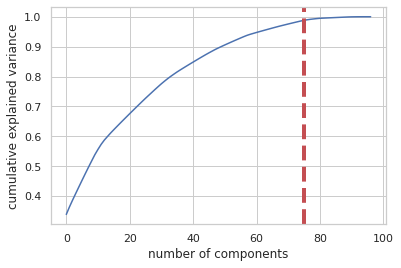

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.338811,0.338811
1,0.363885,0.025074
2,0.387026,0.023140
3,0.409462,0.022436
4,0.431608,0.022146
5,0.453556,0.021948
6,0.475302,0.021747
7,0.496739,0.021437
8,0.517677,0.020938
9,0.538419,0.020742


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
#plotting corelation between number of features and cumulative explained variance, to see how many features should I keep in the data after applying PCA
pca_test = PCA(n_components=97)
pca_test.fit(X_train_scaled)

sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=75, ymin=0, ymax=1)
display(plt.show())

evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)

pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [ ]:
#applying PCA for the data
pca = PCA(n_components=75)
pca.fit(X_train_scaled)
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_valid_scaled)


In [ ]:
#creating the same model as before but with data with PCA applied
model_rfc_PCA = RandomForestClassifier()
model_rfc_PCA.fit(X_train_scaled_pca, y_train)
display(model_rfc_PCA.score(X_train_scaled_pca, y_train))

1.0

In [ ]:
#checking ROC-AUC score of model that used PCA transofrmed data
y_pred = model_rfc_PCA.predict_proba(X_test_scaled_pca)[:, 1]
from sklearn.metrics import roc_auc_score

valid_score = roc_auc_score(y_valid, y_pred)
print('Validation ROC-AUC score:', valid_score)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred_test_PCA = model_rfc_PCA.predict(X_test_scaled_pca)
y_pred_test = model_rfc.predict(X_valid_scaled)

print("Accuracy score of model with PCA", accuracy_score(y_valid, y_pred_test_PCA))
print("Accuracy score of model without PCA", accuracy_score(y_valid, y_pred_test))

Accuracy score of model with PCA 0.6831050995547341
Accuracy score of model without PCA 0.45324708056792407


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit, KFold
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=17)
cv_scores_rf2 = cross_val_score(model_rfc, X, y, cv=cv, 
                                scoring='accuracy', n_jobs=-1)


In [ ]:
print('Model without PCA accuracy score: ', cv_scores_rf2.mean())

Model without PCA accuracy score:  0.7026967991262707


In [ ]:
cv_scores_rf2 = cross_val_score(model_rfc_PCA, X, y, cv=cv, 
                                scoring='accuracy', n_jobs=-1)


In [ ]:
print('Model with PCA accuracy score: ', cv_scores_rf2.mean())

Model with PCA accuracy score:  0.7026295891791985


In [ ]:
#classification report of model without PCA
print(classification_report(y_valid, y_pred_test))

              precision    recall  f1-score   support

       False       0.45      0.64      0.53      5673
        True       0.46      0.28      0.35      6230

    accuracy                           0.45     11903
   macro avg       0.46      0.46      0.44     11903
weighted avg       0.46      0.45      0.43     11903



In [ ]:
#classification report of model with

print(classification_report(y_valid, y_pred_test_PCA))

#as we can see, even though the accuracy of models is pretty much the same, the preicision, recall, and f1-score are better on data with PCA

              precision    recall  f1-score   support

       False       0.68      0.64      0.66      5673
        True       0.69      0.72      0.71      6230

    accuracy                           0.68     11903
   macro avg       0.68      0.68      0.68     11903
weighted avg       0.68      0.68      0.68     11903



In [ ]:
from tensorflow.keras import models, layers, utils, backend as K
n_features = 97
#creating neural network, which will use data without PCA
model = models.Sequential(name="DeepNN", layers=[
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 49)                4802      
                                                                 
 drop1 (Dropout)             (None, 49)                0         
                                                                 
 h2 (Dense)                  (None, 24)                1200      
                                                                 
 drop2 (Dropout)             (None, 24)                0         
                                                                 
 output (Dense)              (None, 1)                 25        
                                                                 
Total params: 6,027
Trainable params: 6,027
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=30)

Epoch 1/50
926/926 [==============================] - 3s 2ms/step - loss: 0.6089 - accuracy: 0.6563
Epoch 2/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5567 - accuracy: 0.6954
Epoch 3/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5452 - accuracy: 0.7064
Epoch 4/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5394 - accuracy: 0.7118
Epoch 5/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5323 - accuracy: 0.7145
Epoch 6/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5286 - accuracy: 0.7167
Epoch 7/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5257 - accuracy: 0.7181
Epoch 8/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5239 - accuracy: 0.7226
Epoch 9/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5198 - accuracy: 0.7238
Epoch 10/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5184 - accuracy: 0.7228

In [ ]:
n_features = 75
#creating neural network, which will use data with PCA

modelPCA = models.Sequential(name="DeepNN", layers=[
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
modelPCA.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 38)                2888      
                                                                 
 drop1 (Dropout)             (None, 38)                0         
                                                                 
 h2 (Dense)                  (None, 19)                741       
                                                                 
 drop2 (Dropout)             (None, 19)                0         
                                                                 
 output (Dense)              (None, 1)                 20        
                                                                 
Total params: 3,649
Trainable params: 3,649
Non-trainable params: 0
_________________________________________________________________


In [ ]:
modelPCA.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
modelPCA.fit(X_train_scaled_pca, y_train, epochs=50, batch_size=30)

Epoch 1/50
926/926 [==============================] - 3s 2ms/step - loss: 0.6179 - accuracy: 0.6441
Epoch 2/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5704 - accuracy: 0.6852
Epoch 3/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5588 - accuracy: 0.6973
Epoch 4/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5529 - accuracy: 0.7001
Epoch 5/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5476 - accuracy: 0.7005
Epoch 6/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5444 - accuracy: 0.7059
Epoch 7/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5445 - accuracy: 0.7050
Epoch 8/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5427 - accuracy: 0.7064
Epoch 9/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5387 - accuracy: 0.7093
Epoch 10/50
926/926 [==============================] - 2s 2ms/step - loss: 0.5388 - accuracy: 0.7070

In [ ]:
import xgboost as xgb
#creating xgb model
model_xgb = xgb.XGBClassifier(
    objective='multi:softmax', colsample_bytree=0.2, learning_rate = 0.01, max_depth=15, alpha=10, n_estimators=100, num_class = 2)

model_xgb.fit(X_train_scaled, y_train)


XGBClassifier(alpha=10, colsample_bytree=0.2, learning_rate=0.01, max_depth=15,
              num_class=2, objective='multi:softmax')

In [ ]:
model_xgb_PCA = xgb.XGBClassifier(
    objective='multi:softmax', colsample_bytree=0.2, learning_rate = 0.01, max_depth=15, alpha=10, n_estimators=100, num_class = 2)
model_xgb_PCA.fit(X_train_scaled_pca, y_train)

XGBClassifier(alpha=10, colsample_bytree=0.2, learning_rate=0.01, max_depth=15,
              num_class=2, objective='multi:softmax')

In [ ]:
y_pred_test_xgb_PCA = model_xgb_PCA.predict(X_test_scaled_pca)
y_pred_test_xgb = model_xgb.predict(X_valid_scaled)

In [ ]:
#final comparision of xgb models, one using PCA modified data
print('xgb with PCA', classification_report(y_valid, y_pred_test_xgb_PCA))
print('xgb without PCA', classification_report(y_valid, y_pred_test_xgb))

xgb with PCA               precision    recall  f1-score   support

       False       0.71      0.56      0.63      5673
        True       0.67      0.79      0.72      6230

    accuracy                           0.68     11903
   macro avg       0.69      0.68      0.68     11903
weighted avg       0.69      0.68      0.68     11903

xgb without PCA               precision    recall  f1-score   support

       False       0.74      0.63      0.68      5673
        True       0.70      0.79      0.74      6230

    accuracy                           0.71     11903
   macro avg       0.72      0.71      0.71     11903
weighted avg       0.72      0.71      0.71     11903

